# EDA

In [131]:
import os
import sys
import librosa
import librosa.display
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

### Basic analysis of audio and getting some doamin knowledge

* we will take first audio file of each category we have and analyze them

In [109]:
current_working_directory= os.getcwd()
main_directory = os.path.dirname(current_working_directory)
category_data_folder_path = os.path.join(main_directory,"Audio_Data")

In [110]:
def get_child_discomfort_categories(category_data_folder_path):
    child_discomfort_categories_raw = os.listdir(category_data_folder_path)
    
    child_discomfort_categories = []
    for i in child_discomfort_categories_raw:
        cat = i.replace("_"," ")
        cat = " ".join(word.capitalize() for word in cat.split())
        child_discomfort_categories.append(cat)
        
    return child_discomfort_categories_raw, child_discomfort_categories

child_discomfort_categories_raw, child_discomfort_categories = get_child_discomfort_categories(category_data_folder_path)

In [111]:
def count_audio_files(folder_path):
    category_and_first_audio_path = {}
    
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        
        if os.path.isdir(category_path):
            audio_file = [file for file in os.listdir(category_path) if file.endswith('.wav') or file.endswith('.mp3')][0]
            first_audio_file_path = os.path.join(category_path,audio_file)
            category_and_first_audio_path[category] = first_audio_file_path
    
    return category_and_first_audio_path

category_and_first_audio_path = count_audio_files(category_data_folder_path)
print(category_and_first_audio_path)

{'belly_pain': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\belly_pain\\549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav', 'burping': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\burping\\5afc6a14-a9d8-45f8-b31d-c79dd87cc8c6-1430757039803-1.7-m-48-bu.wav', 'discomfort': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\discomfort\\10A40438-09AA-4A21-83B4-8119F03F7A11-1430925142-1.0-f-26-dc.wav', 'hungry': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\hungry\\02c3b725-26e4-4a2c-9336-04ddc58836d9-1430726196216-1.7-m-04-hu.wav', 'not_cry': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\not_cry\\109n.wav', 'tired': 'd:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\tired\\03ADDCFB-354E-416D-BF32-260CF47F7060-1433658024-1.1-f-04-ti.wav'}


In [112]:
def get_insights_categorically(category,audio_path):
    plt.figure(figsize=(14,5))
    print(f"You are looking at details of {category}")
    data,sample_rate = librosa.load(audio_path)
    librosa.display.waveshow(data,sr=sample_rate,color='green')
    print(f"The sample rate of given audio file is {sample_rate}")
    print(f"The sample signal data of given audio file after normalizationa is\n{data}")

You are looking at details of belly_pain
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[ 1.1961962e-06  1.5121072e-06  2.1514893e-07 ... -6.0190144e-03
 -5.0411765e-03 -2.6009013e-03]


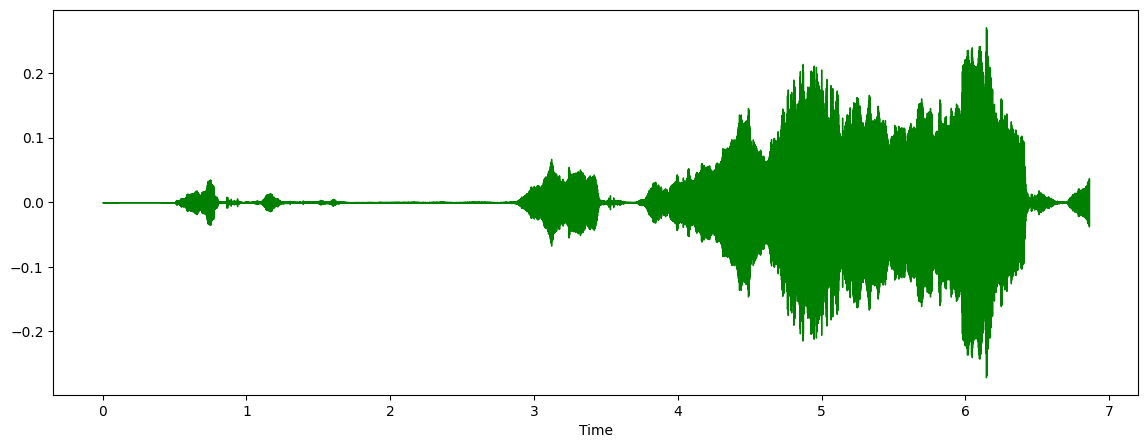

In [113]:
get_insights_categorically('belly_pain','d:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\belly_pain\\549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav')

You are looking at details of burping
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[1.1961843e-06 1.5120954e-06 2.1514148e-07 ... 7.1716227e-02 2.3451954e-02
 9.0551842e-04]


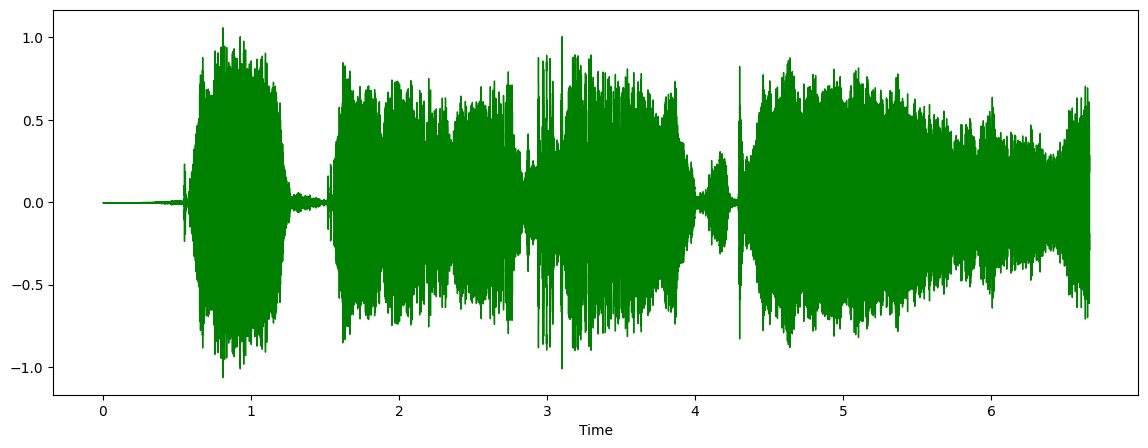

In [114]:
get_insights_categorically('burping','d:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\burping\\5afc6a14-a9d8-45f8-b31d-c79dd87cc8c6-1430757039803-1.7-m-48-bu.wav')

You are looking at details of discomfort
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[ 6.61320911e-12  7.21969880e-12  1.08389174e-11 ... -4.35453564e-01
 -3.72553766e-01 -1.96244985e-01]


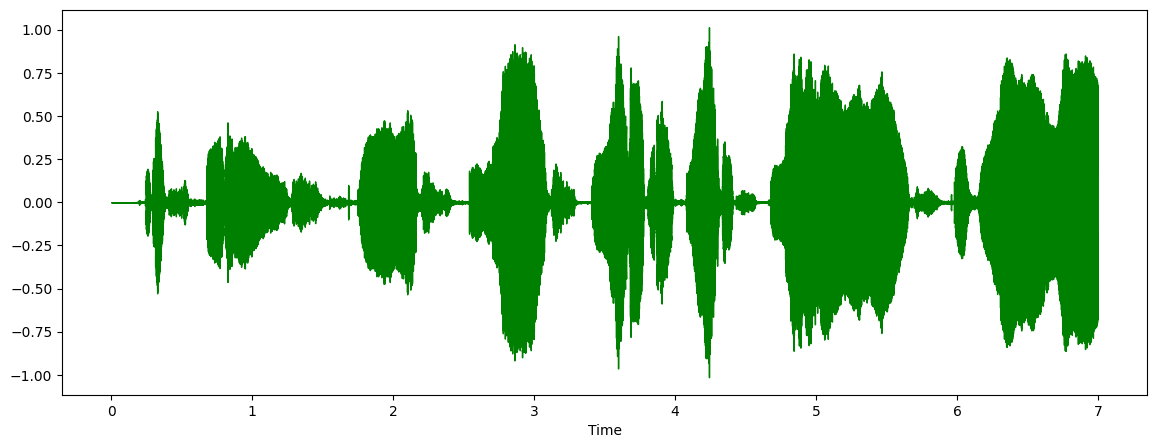

In [115]:
get_insights_categorically('discomfort','d:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\discomfort\\10A40438-09AA-4A21-83B4-8119F03F7A11-1430925142-1.0-f-26-dc.wav')

You are looking at details of hungry
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[-1.2942670e-06 -4.9601099e-06 -4.5998918e-06 ...  2.4277026e-04
  2.5855226e-04  1.6143825e-04]


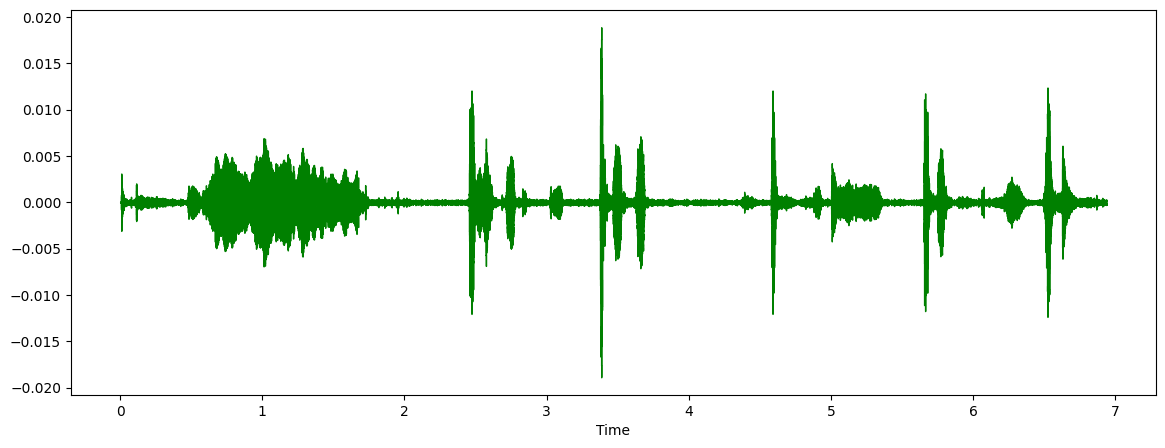

In [116]:
get_insights_categorically('hungry','d:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\hungry\\02c3b725-26e4-4a2c-9336-04ddc58836d9-1430726196216-1.7-m-04-hu.wav')

You are looking at details of not_cry
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[-0.00063665  0.00144273  0.00409322 ...  0.00779399  0.01143499
  0.01414707]


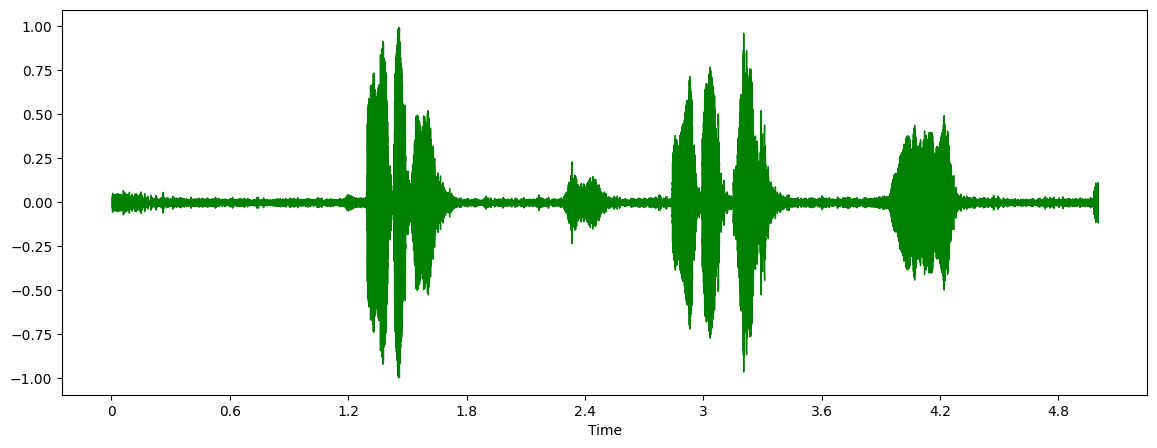

In [117]:
get_insights_categorically('not_cry','d:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\not_cry\\109n.wav')

You are looking at details of tired
The sample rate of given audio file is 22050
The sample signal data of given audio file after normalizationa is
[-0.00039962 -0.00088315 -0.00133592 ...  0.07363188  0.05622154
  0.02862634]


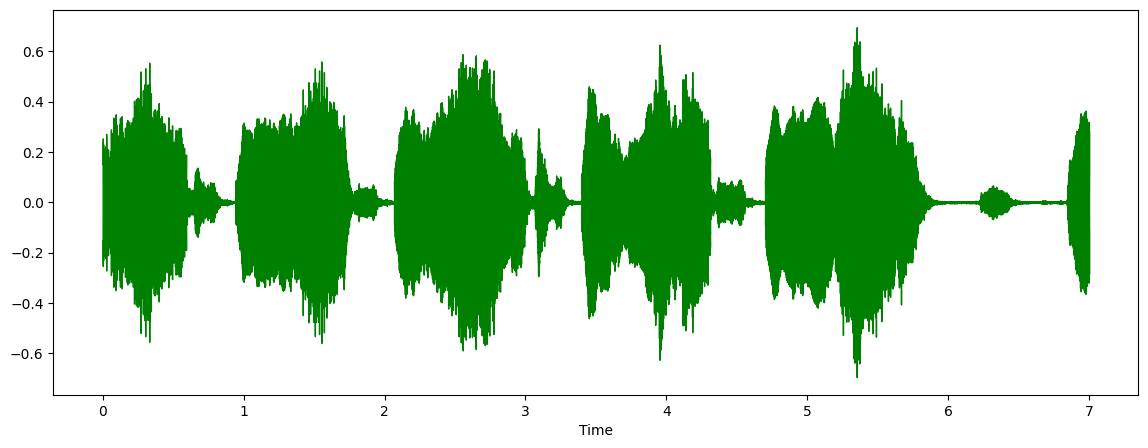

In [118]:
get_insights_categorically('tired','d:\\External_Projects\\Infant_Cry_Audio_Classification\\Audio_Data\\tired\\03ADDCFB-354E-416D-BF32-260CF47F7060-1433658024-1.1-f-04-ti.wav')

#### It can be observed that sound pattern/waveplot for each discomfort category of infant cry audio is different.

## About Sample rate:

* Sample rate is the number of samples per second that are taken of a waveform to create a discete digital signal. The higher the sample rate, the more snapshots you capture of the audio signal. The audio sample rate is measured in kilohertz (kHz) and it determines the range of frequencies captured in digital audio. The more samples taken, the more accurate the digital file will be. A high enough sampling rate allows us to capture every detail of the original sound. 
* For most music applications, 44.1 kHz is the best sample rate to go for. 48 kHz is common when creating music or other audio for video

#### Librosa sets the sampling rate to 22050 that is 22.050 KHz by default

* There are differnet ways of reading audio files such as using "Scipy" which offers different sample rate.

## About sample signal data

#### Librosa normalizes the audio signal data which is nothing but like frequency at given period of timme.

## About channels in audio

* Most of the time in audio we have two channels which we called as "Stereo" avaliable in many headphones.

#### Librosa converts and "stereo" to "mono" channel which is one of many benefits of using it.

# Feature Extraction

* Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse
both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [119]:
def feature_extractor_main(audio_file_path):
    audio,sample_rate = librosa.load(audio_file_path)
    mffcs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mffcs_features.T,axis=0)
    return mfccs_scaled_features

In [120]:
def feature_extractor(category_data_folder_path):
    extracted_features = []
    child_discomfort_categories_raw, child_discomfort_categories = get_child_discomfort_categories(category_data_folder_path)
    for cat in child_discomfort_categories_raw:
        audio_cat_folder_path = os.path.join(category_data_folder_path,cat)
        for file in os.listdir(audio_cat_folder_path):
            if file.endswith('.wav') or file.endswith('.mp3'):
                audio_file_path = os.path.join(audio_cat_folder_path,file)
                mfccs_scaled_features = feature_extractor_main(audio_file_path)
                extracted_features.append([cat,mfccs_scaled_features])
    return extracted_features

In [121]:
extracted_features = feature_extractor(category_data_folder_path)
print(extracted_features)

[['belly_pain', array([-4.97136566e+02,  1.10352684e+02, -5.11886826e+01, -1.50291481e+01,
        1.10090675e+01, -2.71459732e+01, -1.13846874e+01,  5.36425400e+00,
       -1.19785328e+01, -6.33226776e+00,  2.24705338e+00, -5.30904961e+00,
       -5.24831438e+00, -5.96518421e+00, -7.79201937e+00, -5.09783149e-01,
        4.88273430e+00,  8.13493538e+00,  9.49639893e+00,  2.85396886e+00,
       -2.18900895e+00, -2.44266963e+00, -1.53756082e+00,  1.92834187e+00,
       -4.33001637e-01, -7.34505081e+00, -5.98930168e+00, -1.67057002e+00,
       -9.67095852e-01, -1.92890275e+00, -5.18488789e+00, -3.23476076e+00,
        4.46485758e+00,  4.61210680e+00,  7.11203098e-01,  1.44358146e+00,
        1.26403379e+00, -1.21611643e+00, -3.27047396e+00, -3.40743637e+00],
      dtype=float32)], ['belly_pain', array([-4.9682108e+02,  1.5072594e+02, -5.6861252e+01, -4.1189066e-01,
        1.3099051e+01, -3.2893913e+01, -2.0094953e+00, -6.7862921e+00,
       -2.7024172e+01, -1.1144151e-01, -8.8185730e+00

In [122]:
features_and_class_data= pd.DataFrame(extracted_features,columns=['Class','Features'])

In [123]:
features_and_class_data['Class'].value_counts()

Class
hungry        382
not_cry       216
discomfort     27
tired          24
belly_pain     16
burping         8
Name: count, dtype: int64

### Dependent and Independent split of data

In [124]:
X = np.array(features_and_class_data['Features'].to_list())
y = np.array(features_and_class_data['Class'].to_list())

In [125]:
X.shape

(673, 40)

In [126]:
y.shape

(673,)

### Label encoding on my dependent feature y

In [127]:
y = np.array(pd.get_dummies(y))

In [128]:
y

array([[ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       ...,
       [False, False, False, False, False,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False,  True]])

In [129]:
y.shape

(673, 6)

### Train Test Split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [164]:
num_labels = y.shape[1]

In [165]:
model = Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(150,))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [166]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               15150     
                                                                 
 activation_5 (Activation)   (None, 150)               0         
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 100)              

In [167]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [168]:
def create_folder_if_not_exists():
    current_working_directory= os.getcwd()
    main_dir_path = os.path.dirname(current_working_directory)
    artifact_folder_path = os.path.join(main_dir_path,"Artifact")
    if not os.path.exists(artifact_folder_path):
        os.makedirs(artifact_folder_path)
    return artifact_folder_path

In [169]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [170]:
num_epochs = 70
num_batch_size = 32
artifact_folder_path = create_folder_if_not_exists()
checkpointer = ModelCheckpoint(filepath='infant_cry_audio_classifier_model.hdf5',verbose=1,save_best_only=True)
start = datetime.now()
model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs)
duration = datetime.now() - start
print(f"The model training takes {duration}")

Epoch 1/70
17/17 [==============================] - 2s 5ms/step - loss: 33.9082 - accuracy: 0.4089
Epoch 2/70
17/17 [==============================] - 0s 4ms/step - loss: 21.1242 - accuracy: 0.4591
Epoch 3/70
17/17 [==============================] - 0s 4ms/step - loss: 13.6347 - accuracy: 0.4740
Epoch 4/70
17/17 [==============================] - 0s 4ms/step - loss: 11.3421 - accuracy: 0.4833
Epoch 5/70
17/17 [==============================] - 0s 10ms/step - loss: 7.8769 - accuracy: 0.5372
Epoch 6/70
17/17 [==============================] - 0s 4ms/step - loss: 7.4711 - accuracy: 0.5483
Epoch 7/70
17/17 [==============================] - 0s 4ms/step - loss: 6.0882 - accuracy: 0.5502
Epoch 8/70
17/17 [==============================] - 0s 4ms/step - loss: 5.3011 - accuracy: 0.5558
Epoch 9/70
17/17 [==============================] - 0s 4ms/step - loss: 4.6202 - accuracy: 0.5799
Epoch 10/70
17/17 [==============================] - 0s 4ms/step - loss: 3.6794 - accuracy: 0.6004
Epoch 11/70
17

# Prediction model

In [184]:
def prediction(audio_file):
    audio,sample_rate = librosa.load(audio_file)
    mffcs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mffcs_features.T,axis=0)
    features = mfccs_scaled_features.reshape(1,-1)
    output = model.predict(features)
    print(output)
    output = list(output[0]).index(max(list(output[0])))
    output = child_discomfort_categories[output]
    print(output)

In [190]:
prediction(r"D:\External_Projects\Infant_Cry_Audio_Classification\Audio_Data\discomfort\999bf14b-e417-4b44-b746-9253f81efe38-1430844979531-1.7-m-04-ch.wav")

1/1 [==============================] - 0s 33ms/step
[[0.11727685 0.07319529 0.11974595 0.4820618  0.1041429  0.10357717]]
Hungry
